In [1]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from os import getcwd

In [3]:
def get_data(filename):
    with open(filename) as training_file:
        count=0
        images=[]
        labels=[]
        Lines = training_file.readlines()
        for line in Lines:
            if count==0:
                count=1
            else:
                img=line.split(',')
                img1=[]
                for i in img:
                    img1.append(int(i))
                img1=np.array(img1).astype('float')
                img1=img1[1:785]
                img1=img1.reshape(28,28)
                lab=int(img[0])
                images.append(img1)
                labels.append(lab)
        images=np.array(images)
        labels=np.array(labels)
    return images, labels

path_sign_mnist_train = f"{getcwd()}/../content/sign_mnist_test.csv"
path_sign_mnist_test = f"{getcwd()}/../content/sign_mnist_train.csv"
training_images, training_labels = get_data(path_sign_mnist_train)
testing_images, testing_labels = get_data(path_sign_mnist_test)

In [4]:
training_images = np.expand_dims(training_images, axis=3)
testing_images = np.expand_dims(testing_images, axis=3)
train_datagen = ImageDataGenerator(
      rescale = 1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest'
    )

validation_datagen = ImageDataGenerator(rescale = 1./255)

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')
])

model.compile(loss = 'sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])


history = model.fit_generator(train_datagen.flow(training_images, training_labels, batch_size=32),
                              steps_per_epoch=len(training_images) / 32,
                              epochs=10,
                              validation_data=validation_datagen.flow(testing_images, testing_labels, batch_size=32),
                              validation_steps=len(testing_images) / 32)
model.evaluate(testing_images, testing_labels, verbose=0)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
224/224 [==============================] - 27s 115ms/step - loss: 3.1634 - accuracy: 0.0707 - val_loss: 2.9194 - val_accuracy: 0.1327
Epoch 2/10
224/224 [==============================] - 26s 118ms/step - loss: 2.8887 - accuracy: 0.1418 - val_loss: 2.4947 - val_accuracy: 0.2279
Epoch 3/10
224/224 [==============================] - 26s 116ms/step - loss: 2.5431 - accuracy: 0.2294 - val_loss: 1.9871 - val_accuracy: 0.3677
Epoch 4/10
224/224 [==============================] - 26s 115ms/step - loss: 2.2475 - accuracy: 0.3163 - val_loss: 2.0159 - val_accuracy: 0.3730
Epoch 5/10
224/224 [==============================] - 26s 117ms/step - loss: 2.0512 - accuracy: 0.3532 - val_loss: 1.5101 - val_accuracy: 0.5151
Epoch 6/10
224/224 [==============================] - 26s 116ms/step - loss: 1.8807 - accuracy: 0.3902 - val_loss: 1.6412 - val_accuracy: 0.4533
Epoch 7/10
224/224 [==============================] - 26s 117ms/step - loss: 1.7277 - accuracy: 0.4443 - val_loss: 1.3919 - val_ac

[196.95816040039062, 0.48282644152641296]

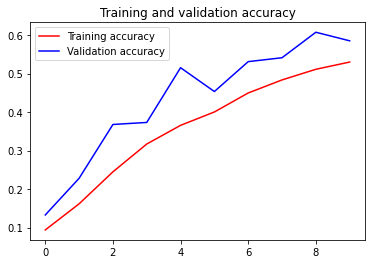

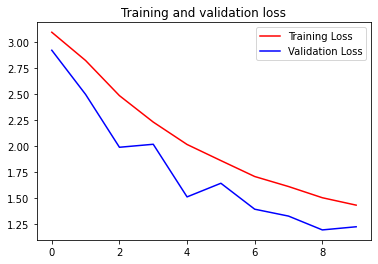

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()